# Main Focus of the Notebook: Extract pixel values from the alternate channel based on our main channel 

In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from skimage import io
import numpy as np 
import sys 

sys.path.append('../src/')

from extract_pixel_data import extract_pixels_data_variable, extract_pixels_data_fixed
from extract_pixel_data import voxel_sum_variable, voxel_sum_fixed

plt.rcParams["font.family"] = ""

### Note:
**To check instructions for a function you can simply use a ? before the function. Remove the # from the below line to run and get instructions.** 

In [2]:
#?extract_pixels_data_variable

In [3]:
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel2_complete.tif'

# Load the TIFF file using skimage
c2_raw = io.imread(file_path)

In [4]:
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel3_complete.tif'

# Load the TIFF file using skimage
c3_raw = io.imread(file_path)

In [5]:
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel1_complete.tif'

# Load the TIFF file using skimage
c1_raw = io.imread(file_path)

In [6]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/track_df_c3_cleaned.pkl'
track_df = pd.read_pickle(path)

In [7]:
c2_raw.shape
#(t,z,y,x)

(130, 75, 258, 275)

In [8]:
c3_raw.shape

(130, 75, 258, 275)

## Calculating values for channel 2 based on available information from channel 3
### We are using the sigma values as radius for constructing a volume. 
### Note:
#### Option to use fixed radius for construction of volume is also there. Refer to extract_pixel_data.py file for more details

In [9]:
offset = [0,0]
col_names = ['mu_z', 'mu_y', 'mu_x']
radi_list = ['sigma_z', 'sigma_y', 'sigma_x']
mean,maximum,minimum,pixel_values,max_loc = extract_pixels_data_variable(raw_image = c2_raw, 
        mean_col_names = col_names, dataframe = track_df, radi_col_names = radi_list, frame_col_name = 'frame')

In [10]:
print(len(minimum))

49867


In [11]:
track_df.head()

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,0,0
1,0,1,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0,1,1
2,0,2,231.007679,40.0,141.0,1.0,2.0,2.0,2.0,0,2,2
3,0,3,185.152538,40.0,58.0,1.0,2.0,1.0,3.0,0,3,3
4,0,4,202.000000,46.0,73.0,1.0,2.0,2.0,3.0,0,4,4


In [12]:
max_loc = np.array(max_loc)

In [13]:
track_df['c2_amp'] = mean
track_df['c2_peak'] = maximum
track_df['c2_peak_x'] = max_loc[:,2]
track_df['c2_peak_y'] = max_loc[:,1]
track_df['c2_peak_z'] = max_loc[:,0]

# Calculate the mean amplitude around c3 peak 


In [14]:
col_names = ['mu_z', 'mu_y', 'mu_x']
radi_list = ['sigma_z', 'sigma_y', 'sigma_x']
mean_c3,maximum_c3,minimum_c3,pixel_values_c3,max_loc_c3 = extract_pixels_data_variable(raw_image = c3_raw, 
                                                    mean_col_names = col_names, dataframe = track_df, 
                                                    radi_col_names = radi_list, frame_col_name = 'frame')

In [15]:
track_df['c3_mean_amp'] = mean_c3

# Now consider volume around the max amp coordinate for channel 2 and take mean for that 

In [16]:
col_names = ['c2_peak_z', 'c2_peak_y', 'c2_peak_x']
radi_list = ['sigma_z', 'sigma_y', 'sigma_x']
peak_mean,maxima,_,_,_ = extract_pixels_data_variable(raw_image = c2_raw, mean_col_names = col_names, 
                                                      dataframe = track_df, radi_col_names = radi_list, 
                                                      frame_col_name = 'frame')

In [17]:
track_df['c2_peak_mean'] = peak_mean

## Now calculate and add voxel sum for both channels 
### We are using a fixed radius to construct the volume 

### Note: 
#### Option to use variable radius also exists. Refer to extract_pixel_data.py for more details 

In [18]:
voxel_sum_array, _ = voxel_sum_fixed(dataframe = track_df,col_names = ['c2_peak_z', 'c2_peak_y', 'c2_peak_x'],
                                     raw_image = c2_raw, radii = [4,2,2], frame_col_name = 'frame')


In [19]:
#calculated around the peak value coordinates
track_df['c2_voxel_sum'] = voxel_sum_array

In [20]:
voxel_sum_array_c3, _ = voxel_sum_fixed(dataframe = track_df,col_names = ['mu_z', 'mu_y', 'mu_x'],
                                       raw_image = c3_raw, radii = [4,2,2], frame_col_name = 'frame')

In [21]:
track_df['c3_voxel_sum'] = voxel_sum_array_c3

In [22]:
track_df

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,...,track_id,c2_amp,c2_peak,c2_peak_x,c2_peak_y,c2_peak_z,c3_mean_amp,c2_peak_mean,c2_voxel_sum,c3_voxel_sum
0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,...,0,122.947826,152.0,9.0,14.0,2.0,163.682353,125.500000,11295,13913
1,0,1,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0,...,1,116.233333,143.0,34.0,87.0,2.0,138.233333,114.826667,20068,19928
2,0,2,231.007679,40.0,141.0,1.0,2.0,2.0,2.0,0,...,2,122.330000,142.0,41.0,142.0,0.0,153.940000,122.853333,15316,22805
3,0,3,185.152538,40.0,58.0,1.0,2.0,1.0,3.0,0,...,3,117.626667,142.0,42.0,59.0,0.0,141.280000,118.016667,14557,20358
4,0,4,202.000000,46.0,73.0,1.0,2.0,2.0,3.0,0,...,4,115.112000,141.0,45.0,74.0,3.0,147.768000,115.502857,23194,21963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49862,129,300,177.830039,160.0,133.0,72.0,2.0,2.0,3.0,129,...,18919,120.153333,146.0,161.0,135.0,70.0,143.660000,118.211429,26421,24970
49863,129,301,179.000000,201.0,207.0,71.0,2.0,1.0,3.0,129,...,18920,115.380952,140.0,203.0,207.0,68.0,130.676190,118.647619,26906,26313
49864,129,302,274.813463,219.0,45.0,71.0,2.0,2.0,2.0,129,...,18921,139.080000,181.0,219.0,43.0,73.0,202.216000,143.040000,21248,38855
49865,129,303,175.445348,231.0,219.0,71.0,3.0,2.0,2.0,129,...,18922,122.320000,156.0,228.0,218.0,72.0,131.234286,126.177143,21927,26220


In [23]:
track_df[track_df['track_id'] == 91]

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,...,track_id,c2_amp,c2_peak,c2_peak_x,c2_peak_y,c2_peak_z,c3_mean_amp,c2_peak_mean,c2_voxel_sum,c3_voxel_sum
91,0,91,220.451256,157.0,110.0,8.0,2.0,4.0,1.0,0,...,91,141.666667,205.0,156.0,111.0,8.0,164.068376,141.711111,17350,23745
502,1,66,236.666667,156.0,110.0,8.0,1.0,2.0,1.0,1,...,91,131.766667,151.0,156.0,112.0,8.0,168.088889,140.500000,16291,23712
932,2,80,222.318943,157.0,110.0,9.0,1.0,2.0,1.0,2,...,91,124.828571,182.0,156.0,112.0,8.0,166.755556,133.066667,15920,25678
1372,3,74,220.151733,157.0,112.0,8.0,2.0,3.0,1.0,3,...,91,134.285714,154.0,156.0,112.0,9.0,159.901099,131.593407,19345,22503
1818,4,88,248.503889,158.0,112.0,9.0,1.0,1.0,1.0,4,...,91,121.800000,147.0,157.0,113.0,9.0,184.111111,130.952381,16770,23289
2248,5,74,238.333333,158.0,111.0,9.0,1.0,2.0,1.0,5,...,91,120.480000,141.0,157.0,113.0,9.0,161.711111,124.800000,16491,22487
2692,6,67,217.864624,156.0,110.0,8.0,1.0,1.0,1.0,6,...,91,120.944444,135.0,156.0,111.0,8.0,156.148148,124.833333,15296,22091
3144,7,79,215.801839,157.0,111.0,9.0,1.0,2.0,1.0,7,...,91,127.371429,148.0,156.0,112.0,8.0,155.600000,127.166667,15707,24699
3575,8,77,223.910560,157.0,111.0,9.0,1.0,2.0,1.0,8,...,91,127.057143,162.0,156.0,113.0,9.0,158.600000,131.325000,18880,24918
4045,9,89,260.091162,157.0,111.0,9.0,1.0,1.0,1.0,9,...,91,124.333333,162.0,156.0,112.0,8.0,169.111111,136.000000,15808,25844


# Calculate relevant intensities for channel 1 based on channel 3 detected spots centers

## Using variable radii function for consistency. Same was done for extracting channel 2 intensities

## Offset set to zero and mean not calculated around the c1_peak because both channel 3 and channel 1 were recorded from the same camera and should not have any offset

In [24]:
offset = [0,0]
col_names = ['mu_z', 'mu_y', 'mu_x']
radi_list = ['sigma_z', 'sigma_y', 'sigma_x']
mean,maximum,minimum,pixel_values,max_loc = extract_pixels_data_variable(raw_image = c1_raw, 
        mean_col_names = col_names, dataframe = track_df, radi_col_names = radi_list, frame_col_name = 'frame')

In [25]:
max_loc = np.array(max_loc)

In [26]:
track_df['c1_amp'] = mean
track_df['c1_peak'] = maximum
track_df['c1_peak_x'] = max_loc[:,2]
track_df['c1_peak_y'] = max_loc[:,1]
track_df['c1_peak_z'] = max_loc[:,0]

In [27]:
track_df.head()

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,...,c2_peak_z,c3_mean_amp,c2_peak_mean,c2_voxel_sum,c3_voxel_sum,c1_amp,c1_peak,c1_peak_x,c1_peak_y,c1_peak_z
0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,...,2.0,163.682353,125.500000,11295,13913,175.329412,231.0,10.0,14.0,2.0
1,0,1,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0,...,2.0,138.233333,114.826667,20068,19928,157.133333,189.0,38.0,87.0,3.0
2,0,2,231.007679,40.0,141.0,1.0,2.0,2.0,2.0,0,...,0.0,153.940000,122.853333,15316,22805,154.560000,198.0,40.0,140.0,3.0
3,0,3,185.152538,40.0,58.0,1.0,2.0,1.0,3.0,0,...,0.0,141.280000,118.016667,14557,20358,152.960000,196.0,42.0,59.0,3.0
4,0,4,202.000000,46.0,73.0,1.0,2.0,2.0,3.0,0,...,3.0,147.768000,115.502857,23194,21963,160.240000,219.0,48.0,72.0,4.0


# Getting voxel sum for channel 1 based on fixed radius around the peak. 

In [28]:
voxel_sum_array, _ = voxel_sum_fixed(dataframe = track_df,col_names = ['c1_peak_z', 'c1_peak_y', 'c1_peak_x'],
                                     raw_image = c1_raw, radii = [4,2,2], frame_col_name = 'frame')


In [29]:
#calculated around the peak value coordinates
track_df['c1_voxel_sum'] = voxel_sum_array

In [30]:
track_df.head()

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,...,c3_mean_amp,c2_peak_mean,c2_voxel_sum,c3_voxel_sum,c1_amp,c1_peak,c1_peak_x,c1_peak_y,c1_peak_z,c1_voxel_sum
0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,...,163.682353,125.500000,11295,13913,175.329412,231.0,10.0,14.0,2.0,12090
1,0,1,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0,...,138.233333,114.826667,20068,19928,157.133333,189.0,38.0,87.0,3.0,32795
2,0,2,231.007679,40.0,141.0,1.0,2.0,2.0,2.0,0,...,153.940000,122.853333,15316,22805,154.560000,198.0,40.0,140.0,3.0,31784
3,0,3,185.152538,40.0,58.0,1.0,2.0,1.0,3.0,0,...,141.280000,118.016667,14557,20358,152.960000,196.0,42.0,59.0,3.0,31530
4,0,4,202.000000,46.0,73.0,1.0,2.0,2.0,3.0,0,...,147.768000,115.502857,23194,21963,160.240000,219.0,48.0,72.0,4.0,37523


In [31]:
track_df.columns

Index(['frame', 'index', 'amplitude', 'mu_x', 'mu_y', 'mu_z', 'sigma_x',
       'sigma_y', 'sigma_z', 'frame_y', 'tree_id', 'track_id', 'c2_amp',
       'c2_peak', 'c2_peak_x', 'c2_peak_y', 'c2_peak_z', 'c3_mean_amp',
       'c2_peak_mean', 'c2_voxel_sum', 'c3_voxel_sum', 'c1_amp', 'c1_peak',
       'c1_peak_x', 'c1_peak_y', 'c1_peak_z', 'c1_voxel_sum'],
      dtype='object')

## Column Name Meanings 
1. **amplitude**: gaussian fitting amplitude for channel 3 
2. **c2_amp**: mean amplitude for channel 2 when compared with channel 3 pixels (mu_x,mu_y,mu_z)
3. **c2_peak**: highest amplitude in channel 2 for the given volume 
4. **c2_peak_x, c2_peak_y, c2_peak_z**: The coordinates for the peak value in channel 2 for the given volume 
5. **c2_peak_mean**: this is the mean value of amplitude for channel 2 found around the c2_peak_x, c2_peak_y and c2_peak_z. This is possibily different that c2_amp because an offset might be present between channel 2 and channel 3, In c2_amp the mean is found around the pixel values for the max of channel 3. Whereas c2_peak_mean is found around the peak of channel 2 for the volume overlapping channel 3.
6. **c3_mean_amp**: this is the mean for the given volume around the peak channel 3 value. Uses mu_x,mu_y,mu_z as the center and sigma_x,sigma_y,sigma_z to calculate the spread 
7. **c2_peak_mean**: This is the mean around the peak value and uses sigma values from channel 3 to construct the volume. A fixed radius can also be provided. 
8. **c2_voxel_sum**: This is the sum of pixel values around the peak value of channel 2. Uses c2_peak_x, c2_peak_y, c2_peak_z as center and a fixed radius. Option to use variable sigma/radi also exists 
9. **c3_voxel_Sum**: This is the sum of pixel values around the peak value of channel 3. Uses mu_x, mu_y, mu_z as center and a fixed radius. Option to use variable sigma/radi also exists 



In [32]:
#track_df.to_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/track_df_updated.pkl')

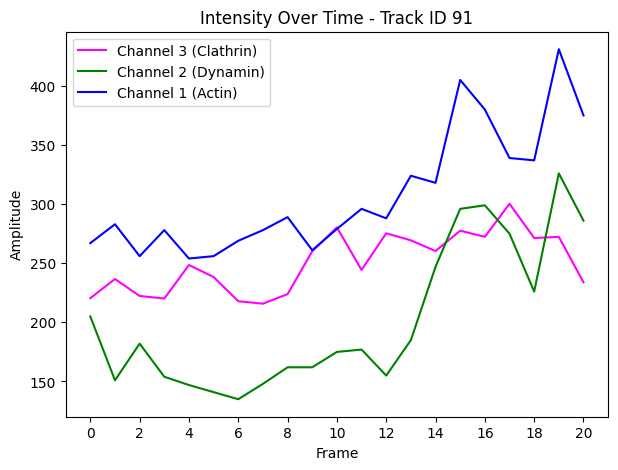

In [62]:
temp_2 = track_df[track_df['track_id']==91]
plt.figure(figsize=(7,5))
plt.title('Intensity Over Time - Track ID 91')
plt.plot(temp_2['frame'], temp_2['amplitude'], label = 'Channel 3 (Clathrin)', color = 'magenta')
plt.plot(temp_2['frame'], temp_2['c2_peak'], label = 'Channel 2 (Dynamin)', color = 'green')
plt.plot(temp_2['frame'], temp_2['c1_peak'], label = 'Channel 1 (Actin)', color = 'blue')
plt.xlabel('Frame')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.ylabel('Amplitude')
plt.legend()

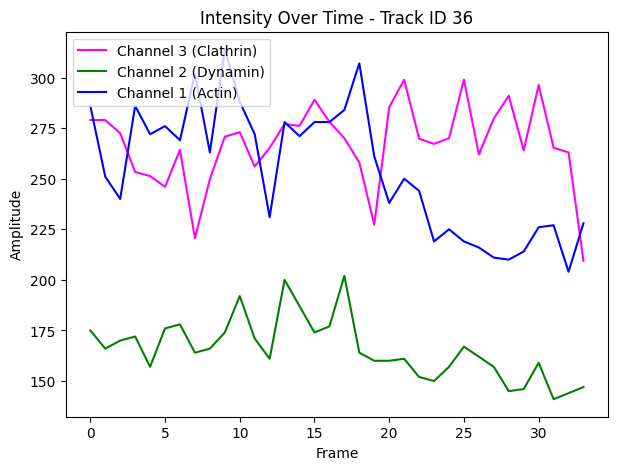

In [63]:
temp_2 = track_df[track_df['track_id']==36]
plt.figure(figsize=(7,5))
plt.title('Intensity Over Time - Track ID 36')
plt.plot(temp_2['frame'], temp_2['amplitude'], label = 'Channel 3 (Clathrin)', color = 'magenta')
plt.plot(temp_2['frame'], temp_2['c2_peak'], label = 'Channel 2 (Dynamin)', color = 'green')
plt.plot(temp_2['frame'], temp_2['c1_peak'], label = 'Channel 1 (Actin)', color = 'blue')
plt.xlabel('Frame')
#plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left')